# **Aprendizaje supervisado**
# SL15. Curvas de análisis para modelos de clasificación


In [ ]:
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color='blue'>**Modelo de Predicción de Supervivientes en Titanic.**</font>

In [ ]:
path = '/content/drive/MyDrive/05_ApendizajeSupervisado/'
df = pd.read_csv(path+'/files/titanic.csv', index_col = 0)
df[['Pclass', 'Sex','Embarked']] = df[['Pclass', 'Sex','Embarked']].astype('category')
df['Age'] = df.Age.fillna(df.Age.mean())
df.dtypes

Survived           int64
Pclass          category
Name              object
Sex             category
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked        category
Signing_date      object
dtype: object

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Signing_date
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1911-05-17
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1911-07-23
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1911-09-08
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1911-06-26
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1911-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1911-08-17
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1911-08-07
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1912-01-30


In [ ]:
X = df[['Pclass', 'Sex','Age','Parch','Fare','Embarked']]
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 4.5 MB/s 


In [ ]:
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
ohe = OneHotEncoder(use_cat_names = True)
X_train_enc = ohe.fit_transform(X_train)
X_test_enc = ohe.transform(X_test)

In [ ]:
X_train, X_train_enc

(            Pclass     Sex   Age  Parch     Fare Embarked
 PassengerId                                              
 417              2  female  34.0      1  32.5000        S
 802              2  female  31.0      1  26.2500        S
 513              1    male  36.0      0  26.2875        S
 456              3    male  29.0      0   7.8958        C
 758              2    male  18.0      0  11.5000        S
 ...            ...     ...   ...    ...      ...      ...
 99               2  female  34.0      1  23.0000        S
 323              2  female  30.0      0  12.3500        Q
 383              3    male  32.0      0   7.9250        S
 366              3    male  30.0      0   7.2500        S
 511              3    male  29.0      0   7.7500        Q
 
 [623 rows x 6 columns],
              Pclass_2.0  Pclass_1.0  Pclass_3.0  Sex_female  Sex_male   Age  \
 PassengerId                                                                   
 417                   1           0          

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_enc)
X_test_sc = sc.transform(X_test_enc)

In [ ]:
X_train_sc, X_test_sc

(array([[ 1.95689994, -0.55571893, -1.12126998, ..., -0.46050218,
         -0.31734321, -0.05675044],
        [ 1.95689994, -0.55571893, -1.12126998, ..., -0.46050218,
         -0.31734321, -0.05675044],
        [-0.51101233,  1.79947082, -1.12126998, ..., -0.46050218,
         -0.31734321, -0.05675044],
        ...,
        [-0.51101233, -0.55571893,  0.89184587, ..., -0.46050218,
         -0.31734321, -0.05675044],
        [-0.51101233, -0.55571893,  0.89184587, ..., -0.46050218,
         -0.31734321, -0.05675044],
        [-0.51101233, -0.55571893,  0.89184587, ..., -0.46050218,
          3.15116241, -0.05675044]]),
 array([[-0.51101233, -0.55571893,  0.89184587, ..., -0.46050218,
         -0.31734321, -0.05675044],
        [-0.51101233, -0.55571893,  0.89184587, ...,  2.17154239,
         -0.31734321, -0.05675044],
        [-0.51101233,  1.79947082, -1.12126998, ...,  2.17154239,
         -0.31734321, -0.05675044],
        ...,
        [ 1.95689994, -0.55571893, -1.12126998, ..., -

In [ ]:
lr = LogisticRegression(random_state = 123)
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
y_pred_train = lr.predict(X_test_sc)
y_proba = lr.predict_proba(X_test_sc)

print('Score Train:', lr.score(X_train_sc, y_train))
print('Score Test:', lr.score(X_test_sc, y_test))

Score Train: 0.8009630818619583
Score Test: 0.8022388059701493


In [ ]:
lr.coef_

array([[ 0.04511367,  0.54088422, -0.49912473,  0.60997679, -0.60997679,
        -0.52093616, -0.11859062,  0.02356485, -0.11445038,  0.06622974,
         0.05134257,  0.19137889]])

In [ ]:
lr.intercept_

array([-0.58372229])

In [ ]:
pip install scikit-plot

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_cumulative_gain, plot_precision_recall, plot_lift_curve

In [ ]:
confusion_matrix(y_test, y_pred)

array([[145,  25],
       [ 28,  70]])

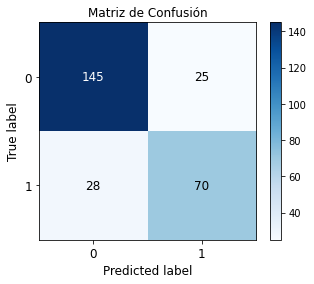

In [ ]:
plot_confusion_matrix(y_test, y_pred, title = 'Matriz de Confusión',text_fontsize = 'large', title_fontsize = 'large', figsize = (5,4))
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8382    0.8529    0.8455       170
           1     0.7368    0.7143    0.7254        98

    accuracy                         0.8022       268
   macro avg     0.7875    0.7836    0.7854       268
weighted avg     0.8011    0.8022    0.8016       268



## <font color='blue'>**¿Cómo Elegir el Mejor Modelo?**</font>

## Curva Precision-Recall

Esta curva presenta el trade-off Precision-Recall de todos los puntos de corte. De esa manera se puede escoger el punto de corte que optimice la métrica que se quiere escoger o utilizar el área bajo la curva como una métrica de medida.

<img src='https://drive.google.com/uc?export=view&id=1ZHKnkQ5Hm-y2dnvqW2mYbAu1L-7-AH0o' width="600" align="center" style="margin-right: 20px">

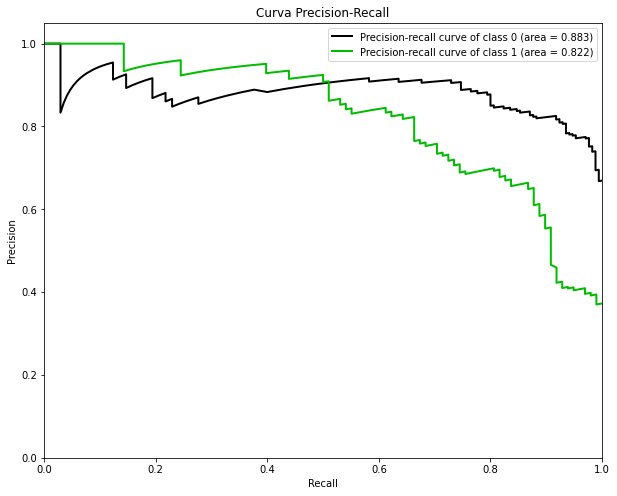

In [ ]:
plot_precision_recall(y_test, y_proba, title = 'Curva Precision-Recall', plot_micro = False, classes_to_plot = [0,1], figsize = (10,8))
plt.show()

In [ ]:
y.value_counts() #Debido a que Titanic es un dataset relativamente desbalanceado, podría ser una métrica más honesta

0    549
1    342
Name: Survived, dtype: int64

**La utilización de esta curva es particularmente útil cuando se trabaja con clases desbalanceadas. Normalmente se utiliza el área bajo la curva (AUC) como una medida, donde 1 representa un modelo perfecto.**

## Curva Receiver Operating Characteristic - ROC

Esta curva representa el trade-off entre el recall (también llamado sensibilidad) y 1 - Especifidad, donde la Especifidad representa el Recall de la otra clase (para problemas binarios). Al igual que la curva representa este trade-off para todos los puntos de corte posible.

Adicionalmente existe una interpretación alternativa, en la cual **la curva ROC representa la probabilidad de que un punto de la clase positiva tenga una mayor probabilidad que un punto de la clase negativa. Es decir, la probabilidad de que el modelo pueda ordenar las predicciones correctamente por probabilidad.**

<img src='https://drive.google.com/uc?export=view&id=1He2TUyM75fd6ja-aSQq3nB04Y5FV6FEN' width="600" align="center" style="margin-right: 20px">

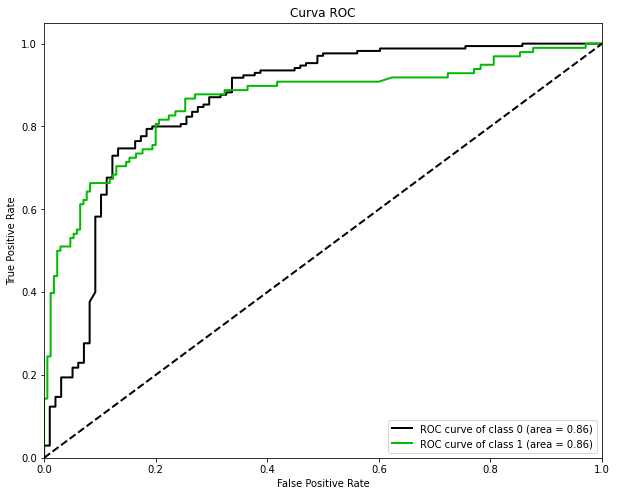

In [ ]:
plot_roc(y_test, y_proba, plot_micro = False, plot_macro = False, title = 'Curva ROC', figsize = (10,8))
plt.show()

## Curva Ganancia

La curva de Ganancia corresponde a una curva que mide qué porcentaje de la data es necesario para encontrar un cierto porcentaje de la clase requerida.

<img src='https://drive.google.com/uc?export=view&id=1ktbS930bK68Pb6t5Qw3HF1M0K8Am672C' width="600" align="center" style="margin-right: 20px">

**Esta métrica suele ser una métrica muy importante en marketing en donde se puede garantizar un cierto porcentaje de acierto si es que se contacta una cierta muestra con mayor probabilidad de la población a predecir.**

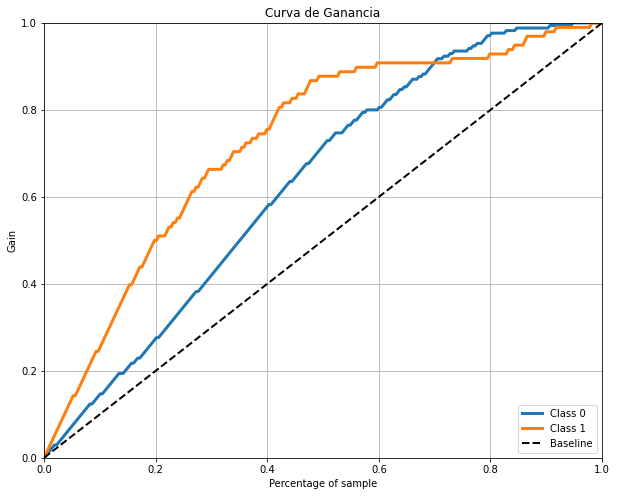

In [ ]:
plot_cumulative_gain(y_test, y_proba, title = 'Curva de Ganancia', figsize = (10,8))
plt.show()